<a href="https://colab.research.google.com/github/LuisRobles18/CSC6850ML/blob/main/Machine_Learning_Project_(Missing_Value_Estimation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Missing value estimation**

Gene expression data often contain missing expression values and it is very important to estimate those missing value as accurate as possible. The first task of the course project is to estimate missing value in the Microarray Data.

In [ ]:
#Importing all required modules
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import math

##**Dataset 1**

[Dataset 1](https://gastate.view.usg.edu/content/enforced2/2481671-CO.090.CSC.CSC4850.XLS.M!.20224/MissingData1.txt?_&d2lSessionVal=3icL40ifVrKwicjXtFcfYp2YD) contains 242 genes with 14 samples. In the following block of code, we can see that in the dataset there are 118 non-observable data (or empty values). Therefore, we need to calculate those empty values by implementing the **KNN Imputation** algorithm.

In [ ]:
#Importing the MissingData3 dataset
df_1 = pd.read_csv('MissingData1.txt', sep='\t', header = None)

total_non_observable_values = df_1[df_1.columns].eq(1.000000e+99).sum().sum()
total_values = len(df_1)*len(df_1.columns)

print('Total of non-observable data: '+str(total_non_observable_values))
print('Total of observable data: '+str(total_values-total_non_observable_values))

Total of non-observable data: 118
Total of observable data: 3270


As seen in the following heatmap, we can see the empty values (also represented as dark spots) in the dataset. With this plot we can have an idea how these empty spots are distributed in the dataset.

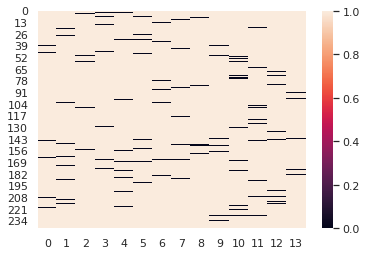

In [ ]:
#We replace the 1.00000e+99 with NaN values
for i in df_1.index:
  for j in range(len(df_1.columns)):
    if df_1[j][i] == 1e+99:
      df_1[j][i] = np.nan

np.random.seed(0)
sns.set_theme()

#Generating a heatmap highlighting all the empty spots
heatmap_df = (df_1.notnull()).astype('int')
data = heatmap_df.to_numpy()
ax = sns.heatmap(data, vmin=0, vmax=1)

In the following block of code, we implement the **KNN Imputation** algorithm and considering K = 5.

In [ ]:
#We split the new dataset with rows containin NaN values and rows not containing NaN values
incomplete_rows = df_1[df_1.isnull().any(axis=1)]
complete_rows = df_1[~df_1.isnull().any(axis=1)]

#We'll find the 5 nearest neighbors
k_value = 5

min_distance = []
min_distance_index = []
weight_value = []

for i in range(k_value):
  min_distance.append(9999)
  min_distance_index.append(-1)
  weight_value.append(0.0)

df_temp = df_1

#We calculate the distance for each incomplete row
for index, row in incomplete_rows.iterrows():
  
  incomplete_rows = df_temp[df_temp.isnull().any(axis=1)]
  complete_rows = df_temp[~df_temp.isnull().any(axis=1)]

  #print('Numer of incomplete rows: '+str(len(complete_rows)))
  
  for index2, row2 in complete_rows.iterrows():
    sum = 0
    empty_value_columns = []
    for i in range(len(incomplete_rows.columns)):
      if pd.isna(row[i]):
        empty_value_columns.append(i)
      else:
        sum += abs(row2[i]-row[i])

    #If list of nearest rows is less than k_value, we add this
    if(len(min_distance) < k_value):
      min_distance_index.append(index2)
      min_distance.append(sum)
    else:
      #We check if the largest value from list is greater than the current distance obtained
      max_value = max(min_distance)
      max_index = min_distance.index(max_value)

      if(max_value > sum):
        min_distance_index[max_index] = int(index2)
        min_distance[max_index] = sum

  #Getting the sum
  temp_sum = 0.0
  for i in range(k_value):
    temp_sum += (1/min_distance[i])
  
  #Getting the weight
  for i in range(k_value):
    weight_value[i] = (1/min_distance[i])/(temp_sum)

  #Calculating the estimation for the given row
  for i in range(len(empty_value_columns)):
    estimation = 0.0
    for j in range(k_value):
      estimation += (weight_value[j]*complete_rows.loc[min_distance_index[j]][empty_value_columns[i]])
    #print('Nearest neighbors: ')
    #print(min_distance_index)
    #print('Estimation for column '+str(empty_value_columns[i])+': '+str(weight_value[j])+'*'+str(complete_rows.loc[min_distance_index[j]][empty_value_columns[i]]))
    row[empty_value_columns[i]] = estimation
    #print(row[empty_value_columns[i]])
  
  incomplete_rows.loc[index] = row

  frames = [incomplete_rows, complete_rows]
  df_temp = pd.concat(frames)

final_df = df_temp.sort_index()

#Exporting to a tsv file
final_df.to_csv('RoblesHernandez_MissingData1.txt', header = False, index = False, sep = '\t')

After filling the missing data in the current dataset, we can now see in the following confusion matrix, that there aren't empty values (dark spots) in the dataset.

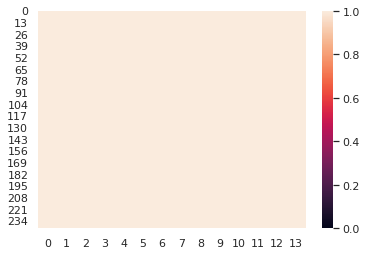

In [ ]:
#Generating a heatmap highlighting all the empty spots
heatmap_df = (final_df.notnull()).astype('int')
data = heatmap_df.to_numpy()
ax = sns.heatmap(data, vmin=0, vmax=1)

##**Dataset 2**

[Dataset 2](https://gastate.view.usg.edu/content/enforced2/2481671-CO.090.CSC.CSC4850.XLS.M!.20224/MissingData2.txt?_&d2lSessionVal=3icL40ifVrKwicjXtFcfYp2YD) contains 758 genes with 50 samples. In the following block of code, we can see that in the dataset there are 3,762 non-observable data (or empty values). Therefore, we need to calculate those empty values by implementing the **KNN Imputation** algorithm.

In [ ]:
#Importing the MissingData3 dataset
df_2 = pd.read_csv('MissingData2.txt', sep='\t', header = None)

total_non_observable_values = df_2[df_2.columns].eq(1.000000e+99).sum().sum()
total_values = len(df_2)*len(df_2.columns)

print('Total of non-observable data: '+str(total_non_observable_values))
print('Total of observable data: '+str(total_values-total_non_observable_values))

Total of non-observable data: 3762
Total of observable data: 34138


As seen in the following heatmap, we can see the empty values (also represented as dark spots) in the dataset. With this plot we can have an idea how these empty spots are distributed in the dataset.

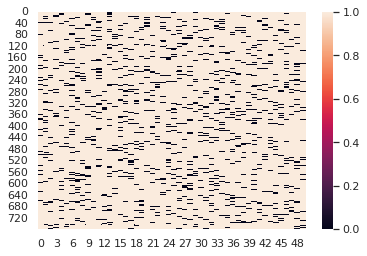

In [ ]:
#We replace the 1.00000e+99 with NaN values
for i in df_2.index:
  for j in range(len(df_2.columns)):
    if df_2[j][i] == 1e+99:
      df_2[j][i] = np.nan

np.random.seed(0)
sns.set_theme()

#Generating a heatmap highlighting all the empty spots
heatmap_df = (df_2.notnull()).astype('int')
data = heatmap_df.to_numpy()
ax = sns.heatmap(data, vmin=0, vmax=1)

In the following block of code, we implement the **KNN imputation** algorithm and considering K = 3.

In [ ]:
#We split the new dataset with rows containin NaN values and rows not containing NaN values
incomplete_rows = df_2[df_2.isnull().any(axis=1)]
complete_rows = df_2[~df_2.isnull().any(axis=1)]

#We'll find the 3 nearest neighbors
k_value = 3

min_distance = []
min_distance_index = []
weight_value = []

for i in range(k_value):
  min_distance.append(9999)
  min_distance_index.append(-1)
  weight_value.append(0.0)

df_temp = df_2

#We calculate the distance for each incomplete row
for index, row in incomplete_rows.iterrows():
  
  incomplete_rows = df_temp[df_temp.isnull().any(axis=1)]
  complete_rows = df_temp[~df_temp.isnull().any(axis=1)]

  #print('Numer of incomplete rows: '+str(len(complete_rows)))
  
  for index2, row2 in complete_rows.iterrows():
    sum = 0
    empty_value_columns = []
    for i in range(len(incomplete_rows.columns)):
      if pd.isna(row[i]):
        empty_value_columns.append(i)
      else:
        sum += abs(row2[i]-row[i])

    #If list of nearest rows is less than k_value, we add this
    if(len(min_distance) < k_value):
      min_distance_index.append(index2)
      min_distance.append(sum)
    else:
      #We check if the largest value from list is greater than the current distance obtained
      max_value = max(min_distance)
      max_index = min_distance.index(max_value)

      if(max_value > sum):
        min_distance_index[max_index] = int(index2)
        min_distance[max_index] = sum

  #Getting the sum
  temp_sum = 0.0
  for i in range(k_value):
    temp_sum += (1/min_distance[i])
  
  #Getting the weight
  for i in range(k_value):
    weight_value[i] = (1/min_distance[i])/(temp_sum)

  #Calculating the estimation for the given row
  for i in range(len(empty_value_columns)):
    estimation = 0.0
    for j in range(k_value):
      estimation += (weight_value[j]*complete_rows.loc[min_distance_index[j]][empty_value_columns[i]])
    #print('Nearest neighbors: ')
    #print(min_distance_index)
    #print('Estimation for column '+str(empty_value_columns[i])+': '+str(weight_value[j])+'*'+str(complete_rows.loc[min_distance_index[j]][empty_value_columns[i]]))
    row[empty_value_columns[i]] = estimation
    #print(row[empty_value_columns[i]])
  
  incomplete_rows.loc[index] = row

  frames = [incomplete_rows, complete_rows]
  df_temp = pd.concat(frames)

final_df = df_temp.sort_index()

#Exporting to a csv file
final_df.to_csv('RoblesHernandez_MissingData2.txt', header = False, index = False, sep = '\t')

After filling the missing data in the current dataset, we can now see in the following confusion matrix, that there aren't empty values (dark spots) in the dataset.

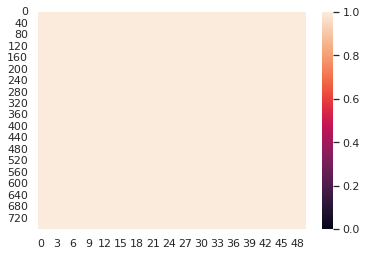

In [ ]:
#Generating a heatmap highlighting all the empty spots
heatmap_df = (final_df.notnull()).astype('int')
data = heatmap_df.to_numpy()
ax = sns.heatmap(data, vmin=0, vmax=1)

##**Dataset 3**

[Dataset 3](https://gastate.view.usg.edu/content/enforced2/2481671-CO.090.CSC.CSC4850.XLS.M!.20224/MissingData3.txt?_&d2lSessionVal=3icL40ifVrKwicjXtFcfYp2YD) contains 273 viruses with 79 samples. There are only 3815 observed values. (Bonus Questions for Undergraduate). Note that the missing entry is filled by 1.00000000000000e+99.  For example, in the Table 1, the second and third entries in the first row are missing values. There are 4% missing values in the Dataset 1 and 10% missing values in the Dataset 2.  Please fill those missing entries with estimated values and return the complete dataset to me.

In [ ]:
#Importing the MissingData3 dataset
df_3 = pd.read_csv('MissingData3.txt', sep='\t', header = None)

total_non_observable_values = df_3[df_3.columns].eq(1.000000e+99).sum().sum()
total_values = len(df_3)*len(df_3.columns)

print('Total of non-observable data: '+str(total_non_observable_values))
print('Total of observable data: '+str(total_values-total_non_observable_values))

Total of non-observable data: 17752
Total of observable data: 3815


In the following block of code, we can see that in the dataset there are 17,752 non-observable data (or empty values). Therefore, we need to calculate those empty values by implementing the **KNN Imputation** algorithm. Moreover, in the following heatmap we can see the distribution of these empty values around the dataset. One of the challenges to fill this data was that none of the rows contained non-empty values.

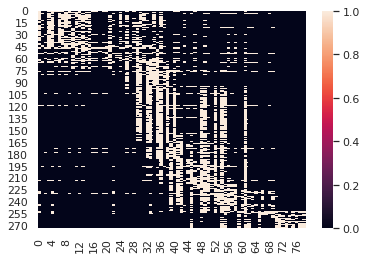

In [ ]:
#We replace the 1.00000e+99 with NaN values
for i in df_3.index:
  for j in range(len(df_3.columns)):
    if df_3[j][i] == 1e+99:
      df_3[j][i] = np.nan

np.random.seed(0)
sns.set_theme()

#Generating a heatmap highlighting all the empty spots
heatmap_df = (df_3.notnull()).astype('int')
data = heatmap_df.to_numpy()
ax = sns.heatmap(data, vmin=0, vmax=1)

The process to fill the missing values is more complex compared to the previous datasets by considering the distribution of empty cells in the dataset. The whole algorithm consisted of the following:

*   Reorder the columns, in a way that the first column contains as most non-empty values as possible.
*   Try to remove the last columns one by one until we get a good amount of non-empty rows in the first n-columns (considered they were ordered as indicated before).
*   Calculate the values for the rest of the rows from the first n selected columns.
*   Adding the remaining columns (the ones that were removed before) one by one and at the same time, looking for more complete rows in order to fill the remaining empty values.
*   Reorder the columns to the original position and export the result.






In [ ]:
#We get the counts of NaN values and we order the columns (first column with less NaN values first)
result = df_3.isnull().sum(axis = 0)
dictionary_null_count_columns = result.to_frame()
dictionary_null_count_columns[1] = 0

for i in dictionary_null_count_columns.index:
  dictionary_null_count_columns[1][i] = int(i)

dictionary_null_count_columns_sorted = dictionary_null_count_columns.sort_values(0)
dictionary_null_count_columns_sorted = dictionary_null_count_columns_sorted.reset_index(drop=True)


df_ordered_columns = pd.DataFrame()
df_ordered_columns = df_ordered_columns.reindex(columns=list(range(len(df_3.columns))))

for i in range(len(df_ordered_columns.columns)):
  df_ordered_columns[i] = df_3[dictionary_null_count_columns_sorted[1][i]]

In [ ]:
#We will start removing columns (from the last one to the first one) until we find rows without empty values

#We will stop once we get at least 10% of the rows without empty values
finished = False
temp_df = df_ordered_columns
last_column = len(df_ordered_columns.columns) - 1

while finished == False:
  
  selected_rows = temp_df[~temp_df.isnull().any(axis=1)]

  
  #print("Number of non-empty rows after removing the column from position "+str(last_column))
  #print(str(len(selected_rows)))

  #We remove last column if there aren't any rows without empty values
  if len(selected_rows) == 0:
    temp_df = temp_df.iloc[:, :-1]
    last_column -= 1
  else:
    if len(selected_rows)/len(df_3) > 0.1:
      finished = True
    else:
      temp_df = temp_df.iloc[:, :-1]
      last_column -= 1


In [ ]:
#We split the new dataset with rows containin NaN values and rows not containing NaN values
incomplete_rows = temp_df[temp_df.isnull().any(axis=1)]
complete_rows = temp_df[~temp_df.isnull().any(axis=1)]

print('The new dataset with '+str(len(temp_df.columns))+' columns contains '+str(len(complete_rows))+'/'+str(len(df_3))+' complete rows')
print('The new dataset with '+str(len(temp_df.columns))+' columns contains '+str(len(incomplete_rows))+'/'+str(len(df_3))+' incomplete rows')

#We will start predicting in those incomplete rows who only have a NaN in the last column (8th column)
#K value will be equual to 10% of these complete dataset (33*10%) = 3
k_value = math.ceil(len(complete_rows)*0.10)

min_distance = []
min_distance_index = []
weight_value = []

for i in range(k_value):
  min_distance.append(9999)
  min_distance_index.append(-1)
  weight_value.append(0.0)

current_column = last_column

for x in reversed(range(last_column+1)):
  #We get the rows without a value only in the nth column
  current_list_columns = list(range(last_column+1))
  current_list_columns.remove(current_column)

  incomplete_nth_column = incomplete_rows.loc[incomplete_rows[current_column].isnull()]
  incomplete_nth_column = incomplete_nth_column.dropna(subset = current_list_columns, how = 'any')

  #We calculate the distance for each incomplete row
  for index, row in incomplete_nth_column.iterrows():
    for index2, row2 in complete_rows.iterrows():
      sum = 0
      for i in range(len(incomplete_nth_column.columns)-1):
        sum += abs(row2[i]-row[i])

      #If list of nearest rows is less than k_value, we add this
      if(len(min_distance) < k_value):
        min_distance_index.append(index2)
        min_distance.append(sum)
      else:
        #We check if the largest value from list is greater than the current distance obtained
        max_value = max(min_distance)
        max_index = min_distance.index(max_value)

        if(max_value > sum):
          min_distance_index[max_index] = int(index2)
          min_distance[max_index] = sum

    #Getting the sum
    temp_sum = 0
    for i in range(k_value):
      temp_sum += (1/min_distance[i])
    
    #Getting the weight
    for i in range(k_value):
      weight_value[i] = (1/min_distance[i])/(temp_sum)

    #Calculating the estimation for the given row
    estimation = 0.0
    for i in range(k_value):
      estimation += (weight_value[i]*complete_rows.loc[min_distance_index[i]][current_column])
    
    #Assigning the values to the incomplete rows
    row[current_column] = estimation

  frames = [incomplete_nth_column, complete_rows]
  complete_rows = pd.concat(frames)
  current_column -= 1

#We add the remaining incomplete rows (in order to get a 273 rows by 8 columns)
new_temp_df = pd.DataFrame()
new_temp_df = new_temp_df.reindex(index=range(len(temp_df)), columns=list(range(len(complete_rows.columns))))

for i in range(len(temp_df)):
  if i in complete_rows.index:
    new_temp_df.loc[i] = complete_rows.loc[i]
  else:
    new_temp_df.loc[i] = incomplete_rows.loc[i]

#=======================================================================================================================================
def add_columns_with_estimation(last_column_value, df_temporary, delimiter_value, zero_detected_value):
  #Now, for the next iterations, we will be adding the missing columns, one by one (and estimate the missing values on each of these columns)
  #Only while the number of complete records is greater than 10% of the total of rows
  for x in range(last_column_value+1,len(df_3.columns)):
    #We add the next column after the last added column to our new dataset
    print("Adding column with index "+str(x)+" to the dataset")
    df_temporary[x] = df_ordered_columns[x]

    if zero_detected_value == False:
      incomplete_rows = df_temporary[df_temporary.isnull().any(axis=1)]
      complete_rows = df_temporary[~df_temporary.isnull().any(axis=1)]

      print('The new dataset with '+str(len(df_temporary.columns))+' columns contains '+str(len(complete_rows))+'/'+str(len(df_3))+' complete rows')
      print('The new dataset with '+str(len(df_temporary.columns))+' columns contains '+str(len(incomplete_rows))+'/'+str(len(df_3))+' incomplete rows')
      if(len(df_3)*delimiter_value > len(complete_rows)):
        print('Cannot continue as number of complete rows is less than '+str(delimiter_value*100)+'%')
        break

      #We get the rows without a value only in the last current column
      current_list_columns = list(range(last_column_value+2))
      current_list_columns.remove(last_column_value+1)

      incomplete_nth_column = incomplete_rows.loc[incomplete_rows[x].isnull()]
      incomplete_nth_column = incomplete_nth_column.dropna(subset = current_list_columns, how = 'any')

      #We will start predicting in those incomplete rows who only have a NaN in the last column (8th column)
      #K value will be equual to 10% of these complete dataset (33*10%) = 3
      k_value = math.ceil(len(complete_rows)*0.10)

      min_distance = []
      min_distance_index = []
      weight_value = []

      for i in range(k_value):
        min_distance.append(9999)
        min_distance_index.append(-1)
        weight_value.append(0.0)

      #We calculate the distance for each incomplete row
      for index, row in incomplete_nth_column.iterrows():
        for index2, row2 in complete_rows.iterrows():
          sum = 0
          for i in range(len(incomplete_nth_column.columns)-1):
            sum += abs(row2[i]-row[i])

          #If list of nearest rows is less than k_value, we add this
          if(len(min_distance) < k_value):
            min_distance_index.append(index2)
            min_distance.append(sum)
          else:
            #We check if the largest value from list is greater than the current distance obtained
            max_value = max(min_distance)
            max_index = min_distance.index(max_value)

            if(max_value > sum):
              min_distance_index[max_index] = int(index2)
              min_distance[max_index] = sum

        #Getting the sum
        temp_sum = 0.0
        for i in range(k_value):
          temp_sum += (1/min_distance[i])
        
        #Getting the weight
        for i in range(k_value):
          weight_value[i] = (1/min_distance[i])/(temp_sum)

        #Calculating the estimation for the given row
        estimation = 0.0
        for i in range(k_value):
          estimation += (weight_value[i]*complete_rows.loc[min_distance_index[i]][last_column_value+1])
        
        #Assigning the values to the incomplete rows
        row[last_column_value+1] = estimation

      frames = [incomplete_nth_column, complete_rows]
      complete_rows = pd.concat(frames)

      #We add the remaining incomplete rows (in order to get a 273 rows by 8 columns)
      df_temporary = pd.DataFrame()
      df_temporary = df_temporary.reindex(index=range(len(temp_df)), columns=list(range(len(complete_rows.columns))))

      for i in range(len(temp_df)):
        if i in complete_rows.index:
          df_temporary.loc[i] = complete_rows.loc[i]
        else:
          df_temporary.loc[i] = incomplete_rows.loc[i]
    else:
      last_column_value += 1
      break

    last_column_value += 1

  return df_temporary,last_column_value


#We ignore the last column before estimating it, since we need to estimate rows with at least 2 missing features, and so on
def add_rows_with_estimation(last_column_value, df_temporary, missing_features_value, delimiter_value, first_try_value):

  incomplete_rows = df_temporary[df_temporary.isnull().any(axis=1)]
  complete_rows = df_temporary[~df_temporary.isnull().any(axis=1)]

  if(len(complete_rows) > 0):
    df_temporary_old = df_temporary
    df_temporary = df_temporary.iloc[:, :-1]

    #We will start predicting in those incomplete rows who only have a NaN in the last column (8th column)
    #K value will be equual to 10% of these complete dataset (33*10%) = 3
    k_value = math.ceil(len(complete_rows)*0.10)

    min_distance = []
    min_distance_index = []
    weight_value = []

    for i in range(k_value):
      min_distance.append(9999)
      min_distance_index.append(-1)
      weight_value.append(0.0)

    #We calculate the distance for each incomplete row
    for index, row in incomplete_rows.iterrows():

      #We get the number of missing features per row:
      missing_features_temp = 0;
      for i in range(len(incomplete_rows.columns)-1):
        if pd.isna(row[i]):
          missing_features_temp += 1
      
      #The estimation will be performed if the missing_features_temp is less or equal than missing_features_value
      if missing_features_temp <= missing_features_value:

        for index2, row2 in complete_rows.iterrows():
          sum = 0
          empty_value_columns = []
          for i in range(len(incomplete_rows.columns)-1):
            if pd.isna(row[i]):
              empty_value_columns.append(i)
            else:
              sum += abs(row2[i]-row[i])

          #If list of nearest rows is less than k_value, we add this
          if(len(min_distance) < k_value):
            min_distance_index.append(index2)
            min_distance.append(sum)
          else:
            #We check if the largest value from list is greater than the current distance obtained
            max_value = max(min_distance)
            max_index = min_distance.index(max_value)

            if(max_value > sum):
              min_distance_index[max_index] = int(index2)
              min_distance[max_index] = sum

        are_identical = False
        last_identical_index_value = -1

        #Getting the sum
        temp_sum = 0.0
        for i in range(k_value):
          if(min_distance[i] == 0):
              are_identical = True
              last_identical_index_value = i
              break
          temp_sum += (1/min_distance[i])
        
        if are_identical == False:
          #Getting the weight
          for i in range(k_value):
            weight_value[i] = (1/min_distance[i])/(temp_sum)

          #Calculating the estimation for the given row
          for i in range(len(empty_value_columns)):
            estimation = 0.0
            for j in range(k_value):
              estimation += (weight_value[j]*complete_rows.loc[min_distance_index[j]][empty_value_columns[i]])
            row[empty_value_columns[i]] = estimation
        else:
          for i in range(len(empty_value_columns)):
            row[empty_value_columns[i]] = complete_rows[i][min_distance_index[last_identical_index_value]]

    frames = [incomplete_rows, complete_rows]
    complete_rows = pd.concat(frames)

    #We add the remaining incomplete rows (in order to get a 273 rows by 8 columns)
    df_temporary_new = pd.DataFrame()
    df_temporary_new = df_temporary_new.reindex(index=range(len(temp_df)), columns=list(range(len(complete_rows.columns))))

    for i in range(len(temp_df)):
      if i in complete_rows.index:
        df_temporary_new.loc[i] = complete_rows.loc[i]
      else:
        df_temporary_new.loc[i] = incomplete_rows.loc[i]

    #We recalculate the number of complete and incomplete rows
    incomplete_rows = df_temporary_new[df_temporary_new.isnull().any(axis=1)]
    complete_rows = df_temporary_new[~df_temporary_new.isnull().any(axis=1)]

    #We add the last removed column again
    print('Trying now with '+str(len(df_temporary.columns)-missing_features_value)+' non-empty features')
    print('The new dataset with '+str(len(df_temporary_new.columns))+' columns contains '+str(len(complete_rows))+'/'+str(len(df_3))+' complete rows')
    print('The new dataset with '+str(len(df_temporary_new.columns))+' columns contains '+str(len(incomplete_rows))+'/'+str(len(df_3))+' incomplete rows')

    if(len(df_3)*delimiter_value > len(complete_rows)):
        print('Number of complete rows still less than '+str(delimiter_value*100)+'%')
        return last_column_value, df_temporary_new, False, False
    else:
        return last_column_value, df_temporary_new, True, False

  else:
    return last_column_value, df_temporary, True, True

#While all the columns have not been added, the loop will continue
delimiter = 0.10
zero_detected = False
while last_column < len(df_3.columns)-1:
  new_temp_df,last_column = add_columns_with_estimation(last_column, new_temp_df, delimiter, zero_detected)
  #If the last column added has not reached the actual last column (due to the number of complete records less than the delimiter)
  if last_column < len(df_3.columns)-1:
    missing_features = 2
    number_of_tries = 0;
    first_try = True
    while True:
      last_column, new_temp_df, result_temp, zero_detected = add_rows_with_estimation(last_column, new_temp_df, missing_features, delimiter, first_try)
      if(result_temp):
        break
      else:
        first_try = False
        number_of_tries += 1
        missing_features += 1
        if(number_of_tries+1 == last_column):
          delimiter = delimiter/2

#As a last step, we reoder the column as it originally was
final_df = pd.DataFrame()
final_df = final_df.reindex(columns=list(range(len(df_3.columns))))

for i in range(len(new_temp_df.columns)):
  final_df[dictionary_null_count_columns_sorted[1][i]] = new_temp_df[i]

The new dataset with 8 columns contains 33/273 complete rows
The new dataset with 8 columns contains 240/273 incomplete rows
Adding column with index 8 to the dataset
The new dataset with 9 columns contains 43/273 complete rows
The new dataset with 9 columns contains 230/273 incomplete rows
Adding column with index 9 to the dataset
The new dataset with 10 columns contains 58/273 complete rows
The new dataset with 10 columns contains 215/273 incomplete rows
Adding column with index 10 to the dataset
The new dataset with 11 columns contains 42/273 complete rows
The new dataset with 11 columns contains 231/273 incomplete rows
Adding column with index 11 to the dataset
The new dataset with 12 columns contains 63/273 complete rows
The new dataset with 12 columns contains 210/273 incomplete rows
Adding column with index 12 to the dataset
The new dataset with 13 columns contains 62/273 complete rows
The new dataset with 13 columns contains 211/273 incomplete rows
Adding column with index 13 t

After filling the missing values, we can see that none of these values has a zero.

In [ ]:
#df.isna().sum().sum()
print("Non zero values: "+str(np.count_nonzero(new_temp_df)))
print("Zero values: "+str(21567-np.count_nonzero(new_temp_df)))

Non zero values: 21567
Zero values: 0


Moreover, we can see in the new heatmap, that there aren't any empty cells (dark spots) anymore.

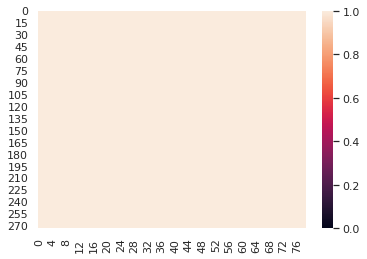

In [ ]:
#Exporting data
final_df.to_csv('RoblesHernandez_MissingData3.txt', header = False, index = False, sep = '\t')
#Generating a heatmap highlighting all the zero scores
final_df[final_df != 0] = 1
data = final_df.to_numpy()
ax = sns.heatmap(data, vmin=0, vmax=1)